In [139]:
import numpy as np
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([[80.5], [81.6], [82.1], [83.7], [83.9], [85]])

In [140]:
X

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [141]:
y

array([[80.5],
       [81.6],
       [82.1],
       [83.7],
       [83.9],
       [85. ]])

In [142]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

/home/luizbag/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/luizbag/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [143]:
X

array([[-1.46385011],
       [-0.87831007],
       [-0.29277002],
       [ 0.29277002],
       [ 0.87831007],
       [ 1.46385011]])

In [144]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [145]:
y

array([[-1.50141978],
       [-0.78334945],
       [-0.45695385],
       [ 0.58751209],
       [ 0.71807033],
       [ 1.43614066]])

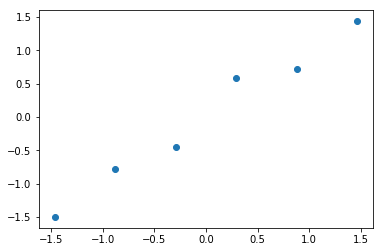

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

# Fórmula da regressão linear simples
y = b0 + b1 * x

In [147]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [148]:
import tensorflow as tf

In [149]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [157]:
erro = tf.losses.mean_squared_error(y, (b0 + b1 * X))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [158]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('output', sess.graph)
    sess.run(init)
    #print(sess.run(b0))
    #print(sess.run(b1))
    for i in range(1000):
        sess.run(treinamento)
    b0_final, b1_final = sess.run([b0, b1])
    writer.close()

In [159]:
b0_final

0.07293496

In [160]:
b1_final

0.94996977

In [161]:
previsoes = b0_final + b1_final * X
previsoes

array([[-1.31767839],
       [-0.76143305],
       [-0.20518771],
       [ 0.35105763],
       [ 0.90730297],
       [ 1.46354831]])

In [162]:
type(previsoes)

numpy.ndarray

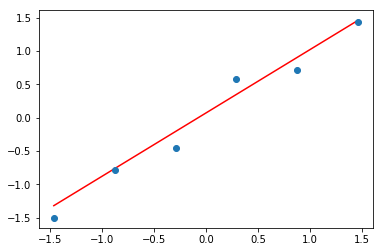

In [163]:
plt.plot(X, previsoes, color = 'red')
plt.plot(X, y, 'o')

In [132]:
scaler_x.transform([[40]])

array([[-0.03481553]])

In [133]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform([[40]]))
previsao

array([[1484.67465275]])

In [134]:
y1 = scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [135]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

array([[1021.37554772],
       [1126.67079887],
       [1231.96605001],
       [1337.26130115],
       [1442.5565523 ],
       [1547.85180344],
       [1653.14705458],
       [1758.44230573],
       [1863.73755687],
       [1969.03280801]])

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)

In [137]:
mae

65.98857534294159

In [138]:
mse

8114.235711734831